Que. 3

Perform K-Means,Hierarchical and DBSCAN Clustering for the Universities.csv data and identify the number of clusters formed and Visualise the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
df= pd.read_csv('Universities.csv')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


#### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [4]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


### EDA

#### Handling NA values

In [5]:
df.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

#### Balancing 

No need to balance as this is a clustering problem

#### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
encoder.fit(df['Univ'])

LabelEncoder()

In [8]:
encoder.classes_

array(['Brown', 'CMU', 'CalTech', 'Columbia', 'Cornell', 'Dartmouth',
       'Duke', 'Georgetown', 'Harvard', 'JohnsHopkins', 'MIT',
       'Northwestern', 'NotreDame', 'PennState', 'Princeton', 'Purdue',
       'Stanford', 'TexasA&M', 'UCBerkeley', 'UChicago', 'UMichigan',
       'UPenn', 'UVA', 'UWisconsin', 'Yale'], dtype=object)

In [9]:
df['Univ'] = encoder.transform(df['Univ'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Univ      25 non-null     int32
 1   SAT       25 non-null     int64
 2   Top10     25 non-null     int64
 3   Accept    25 non-null     int64
 4   SFRatio   25 non-null     int64
 5   Expenses  25 non-null     int64
 6   GradRate  25 non-null     int64
dtypes: int32(1), int64(6)
memory usage: 1.4 KB


#### Scaling

<Axes: >

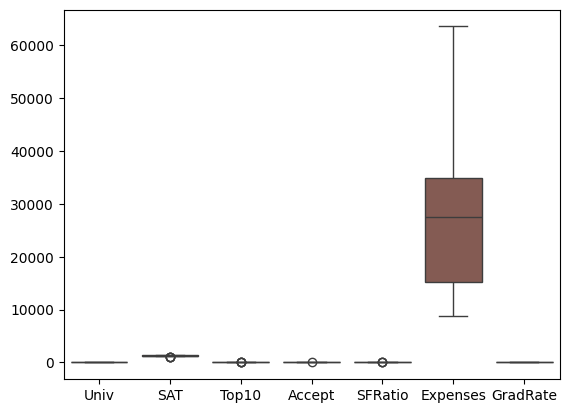

In [11]:
sns.boxplot(df)

In [12]:
from sklearn.preprocessing import StandardScaler

#create an object of standard scaler
scaler = StandardScaler()

#fit the data inot the scaler object
# fit mehthod requires a 2d collection (DF)
scaler.fit(df)

StandardScaler()

In [13]:
array_scaled = scaler.transform(df)
array_scaled

array([[-1.66410059,  0.41028362,  0.6575195 , -0.88986682,  0.07026045,
        -0.33141256,  0.82030265],
       [-1.38675049,  1.39925928,  1.23521235, -0.73465749, -1.68625071,
         2.56038138, -0.64452351],
       [-1.52542554, -0.06065717, -0.76045386,  1.02438157, -0.93346022,
        -0.16712136, -1.65863393],
       [-1.24807544,  0.41028362, -0.02520842, -0.78639393, -0.18066972,
         0.29164871,  0.14422904],
       [-1.10940039,  0.12771914,  0.34241431, -0.32076595,  0.07026045,
        -0.39084607,  0.36958691],
       [-0.97072534,  0.69284809,  0.6575195 , -0.83813038, -0.68253005,
         0.33778044,  0.93298158],
       [-0.83205029,  0.4573777 ,  0.71003703, -0.47597528, -0.18066972,
         0.29695528,  0.93298158],
       [-0.69337525, -0.10775125, -0.13024348, -0.78639393, -0.18066972,
        -0.51381683,  0.59494478],
       [-0.5547002 ,  1.25797704,  0.76255456, -1.30375836, -0.43159988,
         0.85874344,  1.15833946],
       [-0.41602515,  0.3631

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Univ      25 non-null     int32
 1   SAT       25 non-null     int64
 2   Top10     25 non-null     int64
 3   Accept    25 non-null     int64
 4   SFRatio   25 non-null     int64
 5   Expenses  25 non-null     int64
 6   GradRate  25 non-null     int64
dtypes: int32(1), int64(6)
memory usage: 1.4 KB


In [15]:
df_scaled = pd.DataFrame(array_scaled, columns=["Univ", "SAT","Top10","Accept","SFRatio","Expenses","GradRate"])
df_scaled

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,-1.664101,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,-1.386750,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-1.525426,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,-1.248075,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,-1.109400,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,-0.970725,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,-0.832050,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.693375,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,-0.554700,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,-0.416025,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


<Axes: >

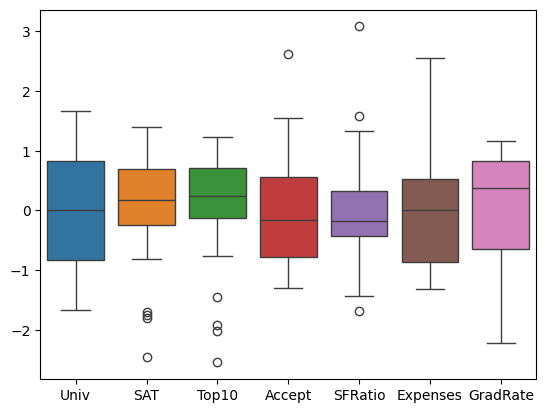

In [16]:
sns.boxplot(df_scaled)

## Model Building

### KMean Clustering

In [17]:
from sklearn.cluster import KMeans

# create an object
kmeans = KMeans(n_clusters=4, random_state=123456)

# fit the data
kmeans.fit(df)

KMeans(n_clusters=4, random_state=123456)

In [18]:
# get clusters
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 3, 0, 1, 1, 0, 1, 3, 1, 1, 3, 1, 0,
       1, 1, 3])

In [19]:
# get centroids
kmeans.cluster_centers_

array([[7.22222222e+00, 1.30388889e+03, 8.27777778e+01, 3.11111111e+01,
        1.10000000e+01, 2.78528889e+04, 8.97777778e+01],
       [1.63333333e+01, 1.15566667e+03, 6.07777778e+01, 5.53333333e+01,
        1.65555556e+01, 1.32243333e+04, 8.08888889e+01],
       [5.50000000e+00, 1.36000000e+03, 8.75000000e+01, 3.45000000e+01,
        6.50000000e+00, 6.11330000e+04, 8.40000000e+01],
       [1.54000000e+01, 1.36100000e+03, 8.90000000e+01, 2.66000000e+01,
        1.14000000e+01, 3.85478000e+04, 9.28000000e+01]])

In [20]:
df['category'] = kmeans.labels_

In [21]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,category
0,0,1310,89,22,13,22704,94,0
1,2,1415,100,25,6,63575,81,2
2,1,1260,62,59,9,25026,72,0
3,3,1310,76,24,12,31510,88,0
4,4,1280,83,33,13,21864,90,0


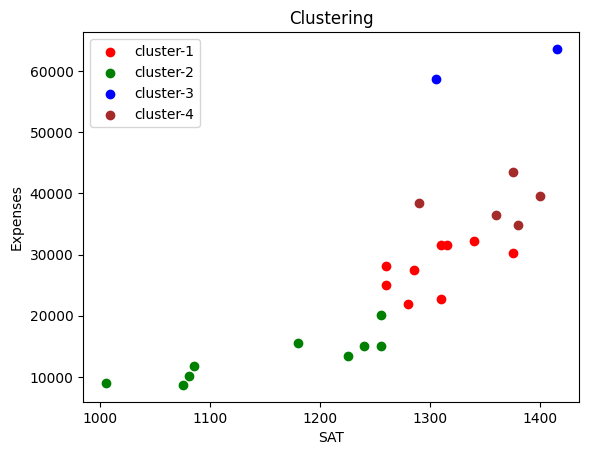

In [22]:
colors = ["red", "green", "blue", "brown", "magenta"]

for cluster_index in range(4):
    plt.scatter(df['SAT'][kmeans.labels_ == cluster_index],
                df['Expenses'][kmeans.labels_ == cluster_index],
               color=colors[cluster_index], label=f"cluster-{cluster_index + 1}")
plt.xlabel("SAT")
plt.ylabel("Expenses")
plt.title("Clustering")
plt.legend()


#### Elbow method

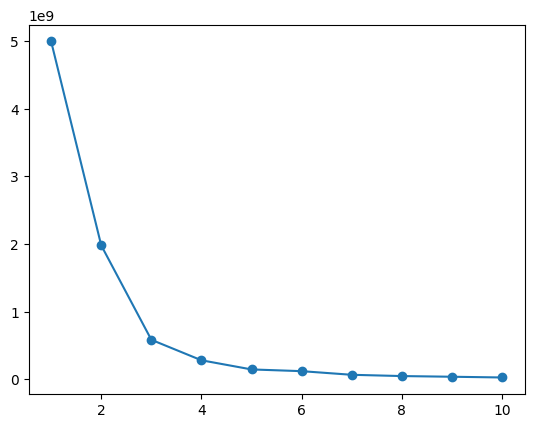

In [23]:
# collect all WSS for different clusters
wss = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

# plot the chart
x = np.arange(1, 11)
plt.scatter(x, wss)
plt.plot(x, wss)

### Hierarchical

In [24]:
from sklearn.cluster import AgglomerativeClustering

# create an object 
agglomerative = AgglomerativeClustering(n_clusters=4)

# fit the data
agglomerative.fit(df)

AgglomerativeClustering(n_clusters=4)

In [25]:
agglomerative.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 1, 1, 0, 1, 3, 1, 1, 3, 1, 0,
       1, 1, 3], dtype=int64)

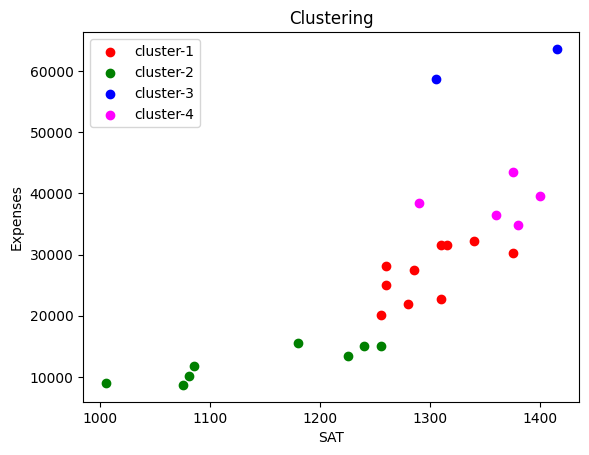

In [26]:
colors = ["red", "green", "blue", "magenta","brown"]

for cluster_index in range(4):
    plt.scatter(df['SAT'][agglomerative.labels_ == cluster_index],
                df['Expenses'][agglomerative.labels_ == cluster_index],
               color=colors[cluster_index], label=f"cluster-{cluster_index + 1}")
plt.xlabel("SAT")
plt.ylabel("Expenses")
plt.title("Clustering")
plt.legend()


#### Dendrogram 

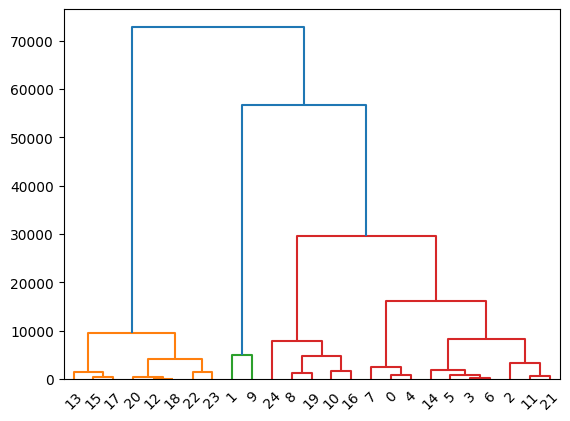

In [27]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='ward')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

### Clustering

In [28]:
from sklearn.cluster import DBSCAN

# create an object
dbscan = DBSCAN(eps=0.01, min_samples=6)

# fit the data
dbscan.fit(df)

DBSCAN(eps=0.01, min_samples=6)

In [29]:
pd.Series(dbscan.labels_).value_counts()

-1    25
Name: count, dtype: int64